# Auto Regressive Conditional Heteroscedasticity (ARCH)

In [ ]:
pip install arch

In [ ]:
import pandas as pd
import numpy as np
import arch  # Import the arch library
import matplotlib.pyplot as plt

In [ ]:
# Calculate daily returns
monthly_hdfc_data['returns'] = monthly_hdfc_data['close'].pct_change()
monthly_hdfc_data['actual_volatility'] = monthly_hdfc_data['returns'].rolling(window=20).std()  # Calculate rolling 20-day volatility
monthly_hdfc_data['volatility'] = monthly_hdfc_data['returns'].std()

print(monthly_hdfc_data['returns'].shape, monthly_hdfc_data['volatility'].shape)

monthly_reliance_data['returns'] = monthly_reliance_data['close'].pct_change()
monthly_reliance_data['actual_volatility'] = monthly_reliance_data['returns'].rolling(window=20).std()  # Calculate rolling 20-day volatility
monthly_reliance_data['volatility'] = monthly_reliance_data['returns'].std()

print(monthly_reliance_data['returns'].shape, monthly_reliance_data['volatility'].shape)

monthly_sunpharma_data['returns'] = monthly_sunpharma_data['close'].pct_change()
monthly_sunpharma_data['actual_volatility'] = monthly_sunpharma_data['returns'].rolling(window=20).std()  # Calculate rolling 20-day volatility
monthly_sunpharma_data['volatility'] = monthly_sunpharma_data['returns'].std()

monthly_sunpharma_data['returns'].shape, monthly_sunpharma_data['volatility'].shape

((84,), (84,))

In [ ]:
monthly_hdfc_data = monthly_hdfc_data.dropna()
monthly_reliance_data = monthly_reliance_data.dropna()
monthly_sunpharma_data = monthly_sunpharma_data.dropna()

monthly_hdfc_data['returns'].isna().sum(), monthly_hdfc_data['returns'].isna().sum(), monthly_hdfc_data['returns'].isna().sum()

(0, 0, 0)

In [ ]:
# Create an ARCH model
model = arch.arch_model(monthly_hdfc_data['returns'], vol='ARCH', p=1)

# Fit the model
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5383.746051562352
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2698.1274968802077
Iteration:      3,   Func. Count:     19,   Neg. LLF: -78.6244369045044
Iteration:      4,   Func. Count:     24,   Neg. LLF: -77.65505199556858
Iteration:      5,   Func. Count:     29,   Neg. LLF: 32.894107010467934
Iteration:      6,   Func. Count:     35,   Neg. LLF: -78.3776944760991
Iteration:      7,   Func. Count:     40,   Neg. LLF: -79.21654114330305
Iteration:      8,   Func. Count:     45,   Neg. LLF: -79.36352191528832
Iteration:      9,   Func. Count:     49,   Neg. LLF: -79.36892989629067
Iteration:     10,   Func. Count:     53,   Neg. LLF: -79.36901247665534
Iteration:     11,   Func. Count:     56,   Neg. LLF: -79.3690124766579
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.36901247665534
            Iterations: 11
            Function evaluations: 56
            Gradient evaluat

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004881. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                79.3690
Distribution:                  Normal   AIC:                          -152.738
Method:            Maximum Likelihood   BIC:                          -146.309
                                        No. Observations:                   63
Date:                Fri, Oct 06 2023   Df Residuals:                       62
Time:                        02:41:27   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0247  1.120e-02      2.202  2.768e-02 [2.

In [ ]:
# Forecast volatility
forecast_horizon = 20  # Number of days to forecast
forecast = results.forecast(start=None, horizon=forecast_horizon)

# Extract the forecasted conditional variances
predicted_variances = forecast.variance.values[-1, :]

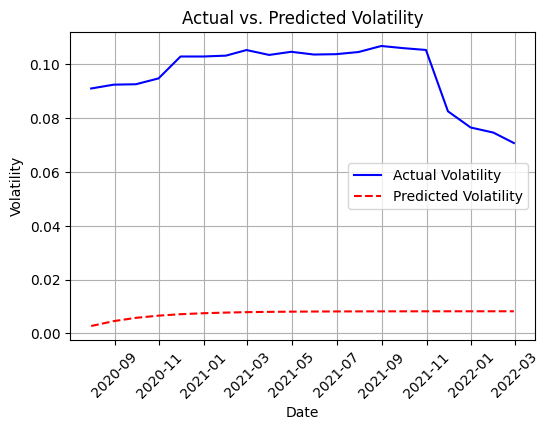

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'stock_data' contains the actual volatility and 'predicted_variances' contains the predicted volatility
plt.figure(figsize=(6, 4))
plt.plot(monthly_hdfc_data.index[-20:], monthly_hdfc_data['actual_volatility'].iloc[-20:], label='Actual Volatility', color='blue')
plt.plot(monthly_hdfc_data.index[-20:], predicted_variances, label='Predicted Volatility', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Actual vs. Predicted Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(monthly_hdfc_data['actual_volatility'].iloc[-20:], predicted_variances)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.008029945258154031


In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.08960996182430853


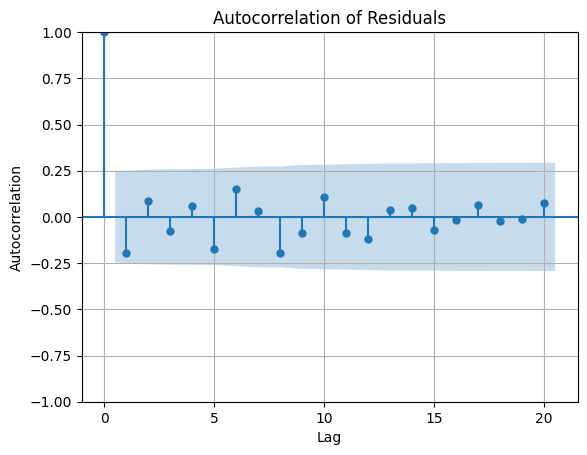

In [ ]:
import statsmodels.api as sm

# Get the residuals from the ARCH model
residuals = results.resid

# Assuming 'residuals' contains the model's residuals
sm.graphics.tsa.plot_acf(residuals, lags=20, title='Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20)
# print("Ljung-Box Test p-values:", p_value)
print(lb_test['lb_pvalue'])
p_values = lb_test['lb_pvalue']

# Check p-values to determine if there is serial correlation
if any(p_values < 0.05):
    print("Serial correlation detected in residuals.")
else:
    print("No significant serial correlation in residuals.")


1     0.111769
2     0.218851
3     0.328277
4     0.451359
5     0.321099
6     0.273188
7     0.367175
8     0.237418
9     0.274889
10    0.289253
11    0.322482
12    0.322334
13    0.389925
14    0.452915
15    0.494638
16    0.565865
17    0.611095
18    0.673692
19    0.732509
20    0.753300
Name: lb_pvalue, dtype: float64
No significant serial correlation in residuals.


In [ ]:
arch_test = results.arch_lm_test()
print("ARCH Test Results:", arch_test)

ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 11.4189
P-value: 0.4089
Distributed: chi2(11)


In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("ARCH Test Results:", arch_test)

Mean Squared Error (MSE): 0.008029945258154031
Root Mean Squared Error (RMSE): 0.08960996182430853
ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 11.4189
P-value: 0.4089
Distributed: chi2(11)


<ipython-input-148-fff440270b5b>:13: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=monthly_hdfc_data.index[-1], periods=forecast_horizon + 1, closed='right'), forecasted_close_price, label='Forecasted Close Price', linestyle='--', color='green', linewidth=2)


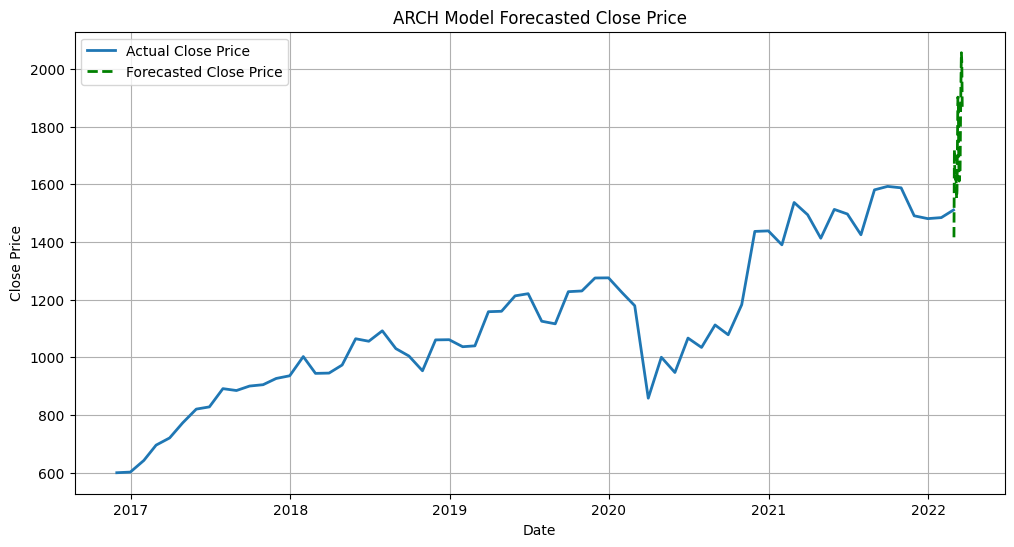

In [ ]:
# Get the last observed volatility
last_volatility = monthly_hdfc_data['returns'].rolling(window=20).std().dropna()

# Generate a simulated return series based on the forecasted volatility
simulated_returns = np.random.normal(scale=np.sqrt(forecast.variance.values[-1, :]), size=forecast_horizon)

# Calculate the forecasted close price
forecasted_close_price = monthly_hdfc_data['close'].iloc[-1] * np.exp(simulated_returns.cumsum())

# Plot the forecasted close price
plt.figure(figsize=(12, 6))
plt.plot(monthly_hdfc_data.index, monthly_hdfc_data['close'], label='Actual Close Price', linewidth=2)
plt.plot(pd.date_range(start=monthly_hdfc_data.index[-1], periods=forecast_horizon + 1, closed='right'), forecasted_close_price, label='Forecasted Close Price', linestyle='--', color='green', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARCH Model Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create an ARCH model
model = arch.arch_model(monthly_reliance_data['returns'], vol='ARCH', p=1)

# Fit the model
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9382.57368697329
Iteration:      2,   Func. Count:     13,   Neg. LLF: 15708.61520730251
Iteration:      3,   Func. Count:     19,   Neg. LLF: -55.53727554584363
Iteration:      4,   Func. Count:     26,   Neg. LLF: -63.266001832580706
Iteration:      5,   Func. Count:     31,   Neg. LLF: -63.26705095116795
Optimization terminated successfully    (Exit mode 0)
            Current function value: -63.26705095116795
            Iterations: 5
            Function evaluations: 31
            Gradient evaluations: 5


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008311. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                63.2671
Distribution:                  Normal   AIC:                          -120.534
Method:            Maximum Likelihood   BIC:                          -114.057
                                        No. Observations:                   64
Date:                Fri, Oct 06 2023   Df Residuals:                       63
Time:                        02:42:22   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0295  1.098e-02      2.687  7.199e-03 [7.

In [ ]:
# Forecast volatility
forecast_horizon = 20  # Number of days to forecast
forecast = results.forecast(start=None, horizon=forecast_horizon)

# Extract the forecasted conditional variances
predicted_variances = forecast.variance.values[-1, :]

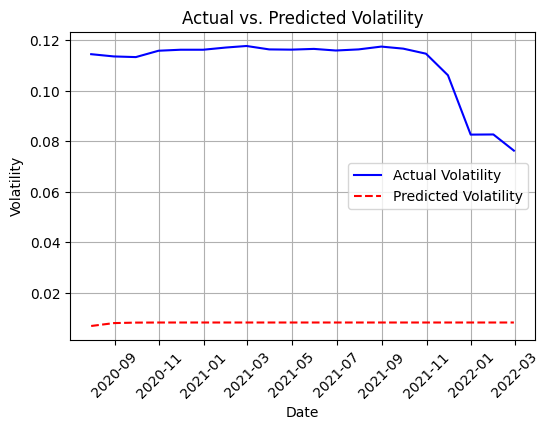

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'stock_data' contains the actual volatility and 'predicted_variances' contains the predicted volatility
plt.figure(figsize=(6, 4))
plt.plot(monthly_reliance_data.index[-20:], monthly_reliance_data['actual_volatility'].iloc[-20:], label='Actual Volatility', color='blue')
plt.plot(monthly_reliance_data.index[-20:], predicted_variances, label='Predicted Volatility', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Actual vs. Predicted Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(monthly_reliance_data['actual_volatility'].iloc[-20:], predicted_variances)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.010553354927163822


In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.10272952315261578


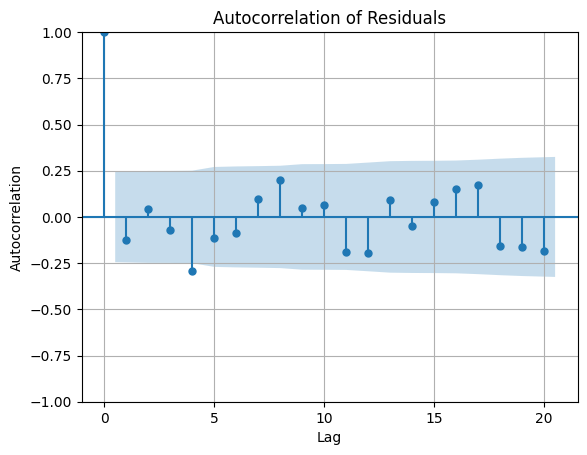

In [ ]:
import statsmodels.api as sm

# Get the residuals from the ARCH model
residuals = results.resid

# Assuming 'residuals' contains the model's residuals
sm.graphics.tsa.plot_acf(residuals, lags=20, title='Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20)
# print("Ljung-Box Test p-values:", p_value)
print(lb_test['lb_pvalue'])
p_values = lb_test['lb_pvalue']

# Check p-values to determine if there is serial correlation
if any(p_values < 0.05):
    print("Serial correlation detected in residuals.")
else:
    print("No significant serial correlation in residuals.")


1     0.316975
2     0.569646
3     0.686937
4     0.107701
5     0.129338
6     0.168900
7     0.201198
8     0.118051
9     0.162978
10    0.207807
11    0.136676
12    0.085095
13    0.098672
14    0.128014
15    0.148711
16    0.122356
17    0.087767
18    0.069396
19    0.051957
20    0.031469
Name: lb_pvalue, dtype: float64
Serial correlation detected in residuals.


In [ ]:
arch_test = results.arch_lm_test()
print("ARCH Test Results:", arch_test)

ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 13.3828
P-value: 0.2690
Distributed: chi2(11)


In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("ARCH Test Results:", arch_test)

Mean Squared Error (MSE): 0.010553354927163822
Root Mean Squared Error (RMSE): 0.10272952315261578
ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 13.3828
P-value: 0.2690
Distributed: chi2(11)


In [ ]:
# Create an ARCH model
model = arch.arch_model(monthly_sunpharma_data['returns'], vol='ARCH', p=1)

# Fit the model
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 273622.6477913157
Iteration:      2,   Func. Count:     13,   Neg. LLF: -16.480074570655404
Iteration:      3,   Func. Count:     20,   Neg. LLF: -62.91539243541735
Iteration:      4,   Func. Count:     24,   Neg. LLF: -62.915453875839745
Iteration:      5,   Func. Count:     28,   Neg. LLF: -62.9154890409626
Iteration:      6,   Func. Count:     31,   Neg. LLF: -62.9154888949274
Optimization terminated successfully    (Exit mode 0)
            Current function value: -62.9154890409626
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008197. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                62.9155
Distribution:                  Normal   AIC:                          -119.831
Method:            Maximum Likelihood   BIC:                          -113.354
                                        No. Observations:                   64
Date:                Fri, Oct 06 2023   Df Residuals:                       63
Time:                        02:43:39   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.2618e-03  1.034e-02      0.606      0.545 

In [ ]:
# Forecast volatility
forecast_horizon = 20  # Number of days to forecast
forecast = results.forecast(start=None, horizon=forecast_horizon)

# Extract the forecasted conditional variances
predicted_variances = forecast.variance.values[-1, :]

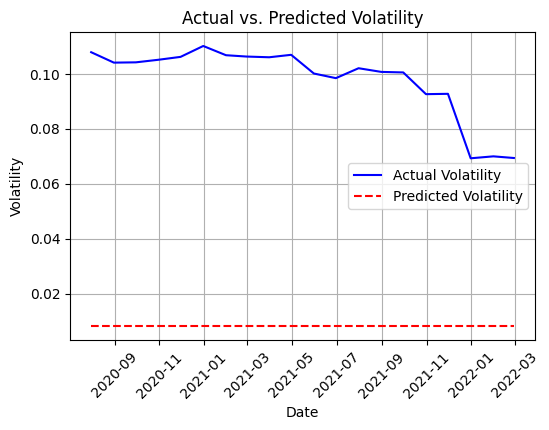

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'stock_data' contains the actual volatility and 'predicted_variances' contains the predicted volatility
plt.figure(figsize=(6, 4))
plt.plot(monthly_sunpharma_data.index[-20:], monthly_sunpharma_data['actual_volatility'].iloc[-20:], label='Actual Volatility', color='blue')
plt.plot(monthly_sunpharma_data.index[-20:], predicted_variances, label='Predicted Volatility', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Actual vs. Predicted Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(monthly_sunpharma_data['actual_volatility'].iloc[-20:], predicted_variances)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.008210587929449445


In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.09061229458218925


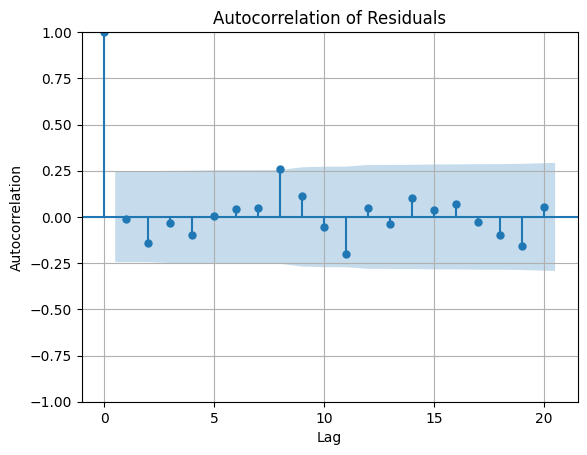

In [ ]:
import statsmodels.api as sm

# Get the residuals from the ARCH model
residuals = results.resid

# Assuming 'residuals' contains the model's residuals
sm.graphics.tsa.plot_acf(residuals, lags=20, title='Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20)
# print("Ljung-Box Test p-values:", p_value)
print(lb_test['lb_pvalue'])
p_values = lb_test['lb_pvalue']

# Check p-values to determine if there is serial correlation
if any(p_values < 0.05):
    print("Serial correlation detected in residuals.")
else:
    print("No significant serial correlation in residuals.")


1     0.918986
2     0.501254
3     0.692585
4     0.714549
5     0.832573
6     0.894419
7     0.933466
8     0.484858
9     0.482807
10    0.554610
11    0.371420
12    0.439254
13    0.511617
14    0.518251
15    0.584832
16    0.622346
17    0.684883
18    0.689739
19    0.599180
20    0.642702
Name: lb_pvalue, dtype: float64
No significant serial correlation in residuals.


In [ ]:
arch_test = results.arch_lm_test()
print("ARCH Test Results:", arch_test)

ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 2.9219
P-value: 0.9917
Distributed: chi2(11)


In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("ARCH Test Results:", arch_test)

Mean Squared Error (MSE): 0.008210587929449445
Root Mean Squared Error (RMSE): 0.09061229458218925
ARCH Test Results: ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 2.9219
P-value: 0.9917
Distributed: chi2(11)
